In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

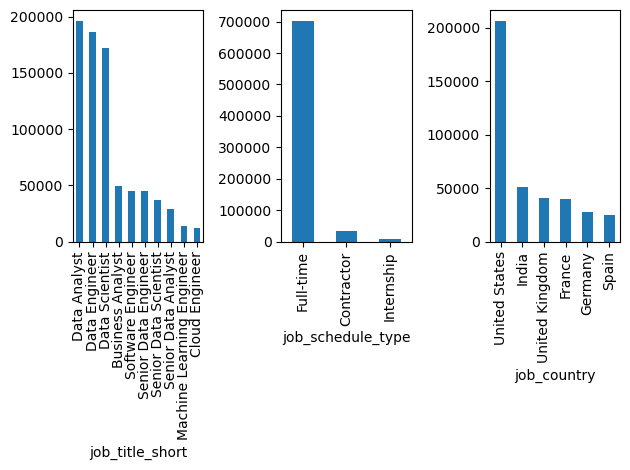

In [10]:
fig, ax = plt.subplots(1, 3)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
df['job_country'].value_counts().head(6).plot(kind='bar', ax=ax[2])

fig.tight_layout()


# Example - Counts of Top Skills in Job Postings

In [11]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [12]:
job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst']

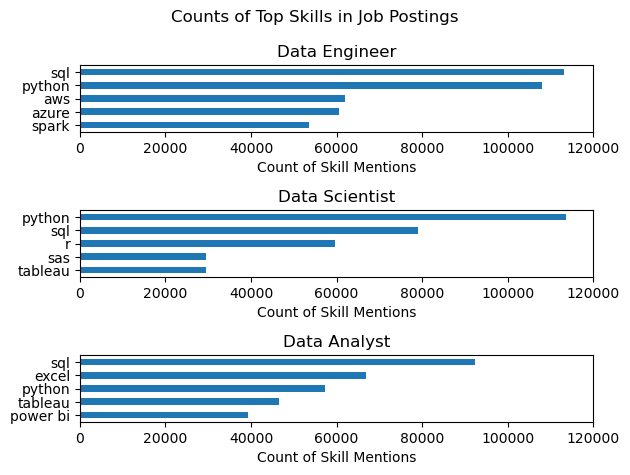

In [29]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
   df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
   df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].set_xlabel('Count of Skill Mentions')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings')
fig.tight_layout()
